/var/folders/xy/t0wbjl2d3q310626h3hpzxw80000gn/T/ipykernel_36299/1038146766.py:148: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(celebA_dataset[i][0]) # Convert image to NumPy array


Image data shape: (1000, 12288)
Standardized image data shape: (1000, 12288)
Number of components needed to retain 95% variance: 190


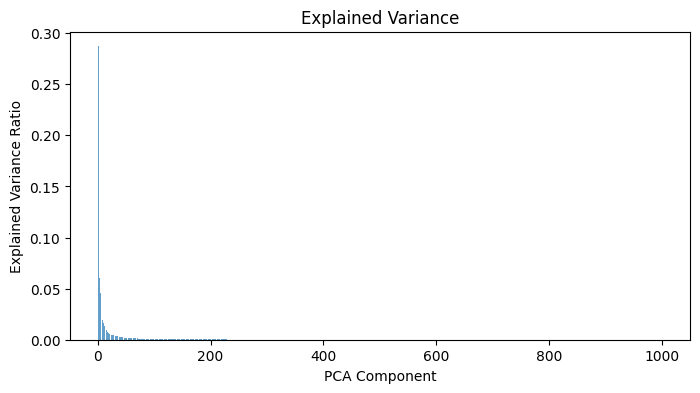

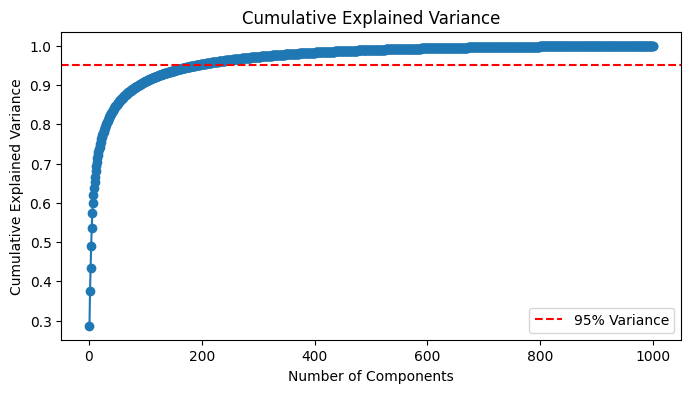

Reduced image data shape: (1000, 190)


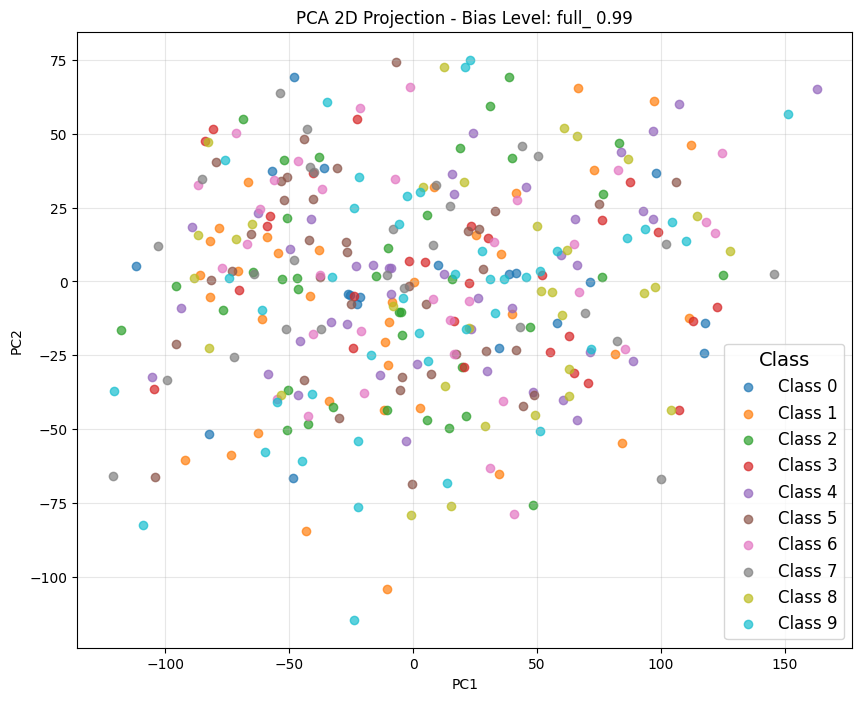

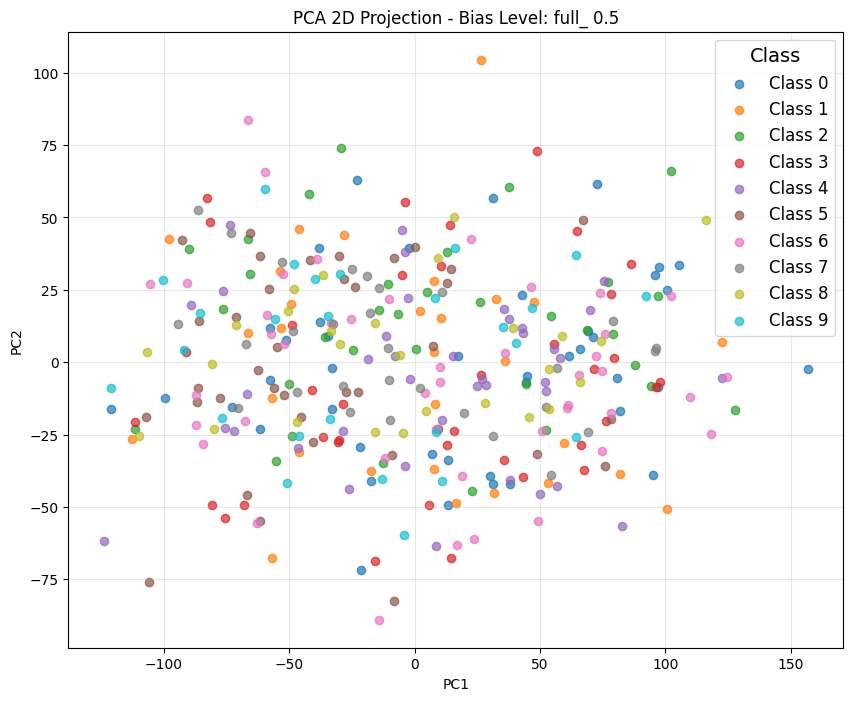

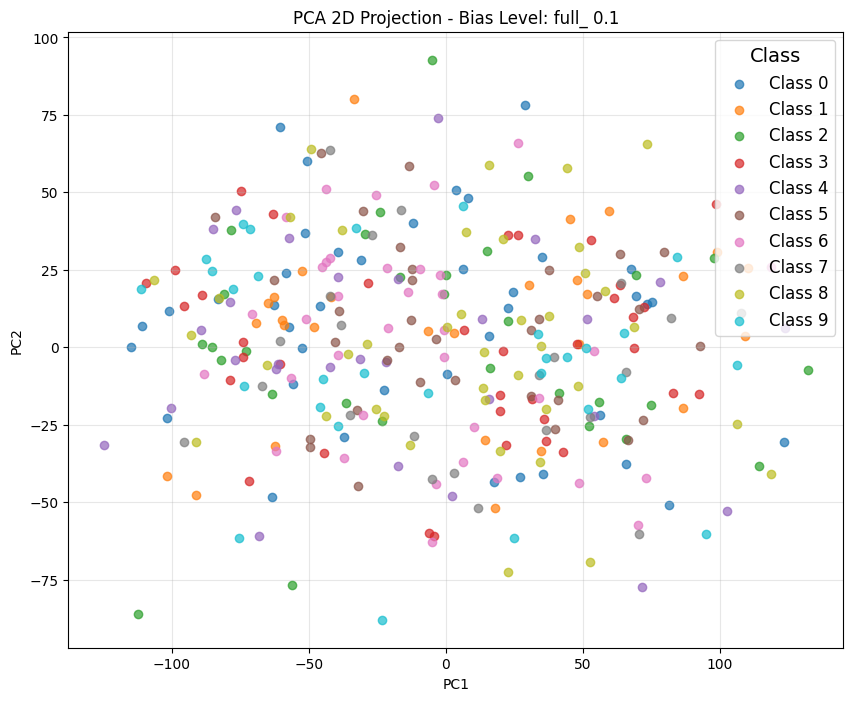

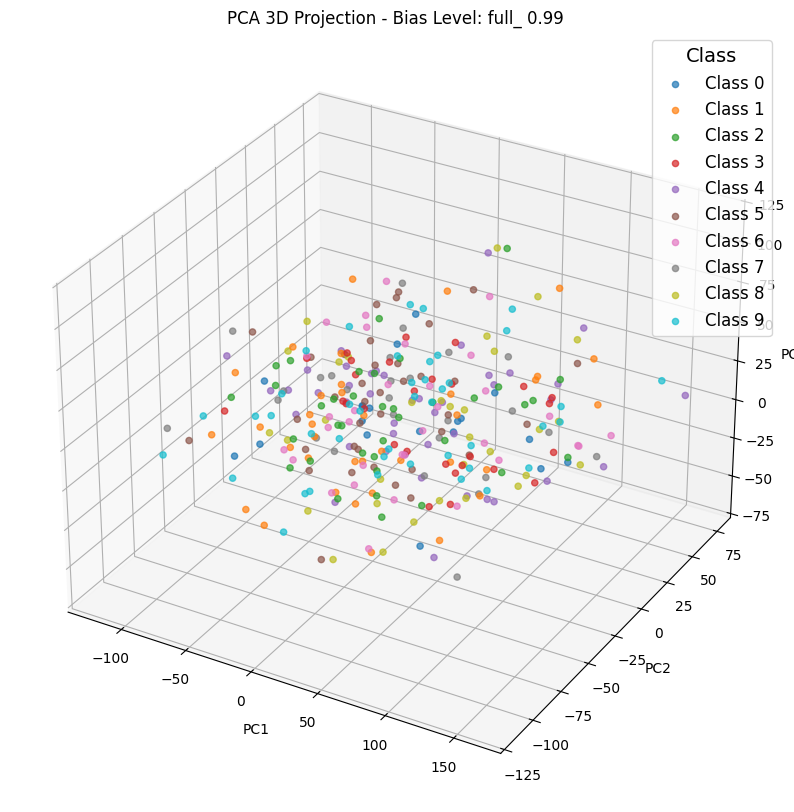

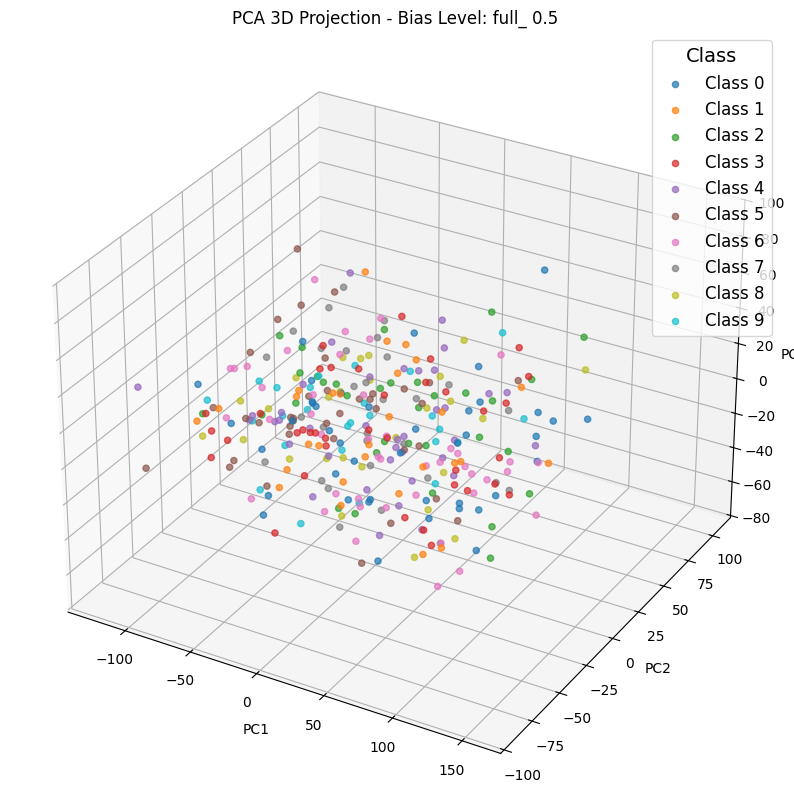

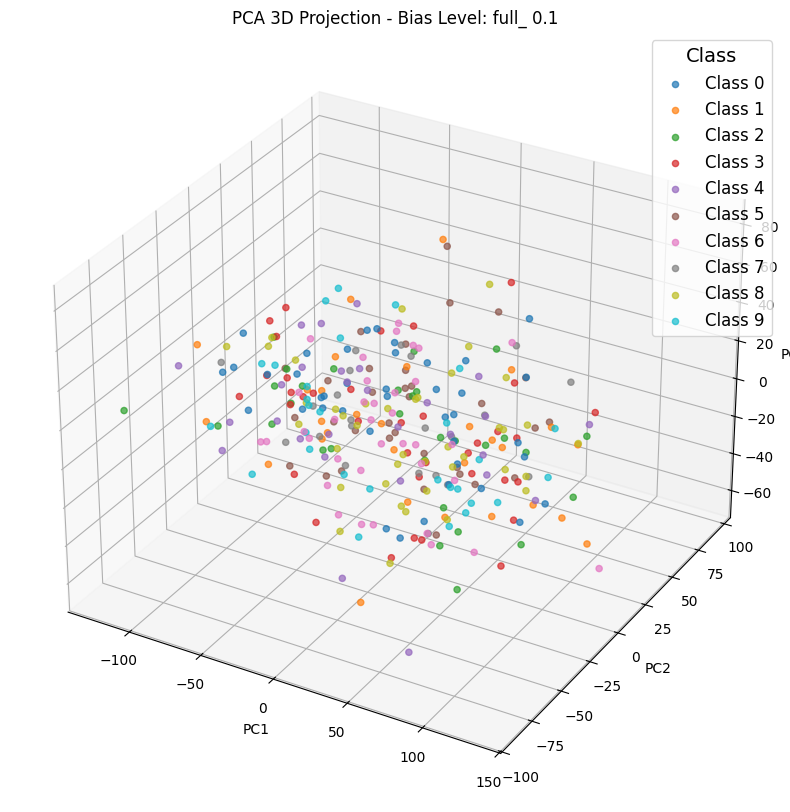

In [10]:
# ### ASSUMING THE DATA HAS BEEN LOADED WITH CAPSTONE_LOADDATA.IPYNB ###

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# from torchvision import transforms, datasets


# ### Convert images to arrays, flatten, standardize
# data_path = '/Users/connargibbon/Desktop/Capstone'
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),  # Resize the image to 64x64
#     transforms.ToTensor()         # Convert the image to a tensor
# ])

# celebA_dataset = datasets.CelebA(root=data_path, download=True, transform=transform) 
# mnist_dataset = datasets.MNIST(root=data_path, train=True, download=True, transform=transform)

# # Convert images to NumPy arrays and flatten
# images = []
# for i in range(1000): # Too high is difficult for PC to handle
#     img = np.array(celebA_dataset[i][0]) # Convert image to NumPy array
#     img_flat = img.flatten() # Flatten the image
#     images.append(img_flat) # Add to list

# # Convert list to array
# images_np = np.array(images)

# # Prints shape before standardization
# print(f"Image data shape: {images_np.shape}") 

# # Standardize the data
# scaler = StandardScaler()
# images_np_scaled = scaler.fit_transform(images_np)

# # Prints standardized shape
# print(f"Standardized image data shape: {images_np_scaled.shape}") 

# ### Apply PCA to data

# pca_full = PCA()
# image_pca_full = pca_full.fit_transform(images_np_scaled)

# # Compute explained variance and cumulative variance
# explained_variance = pca_full.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance)

# # Find minimum number of components needed for 95% variance
# num_components_needed = np.argmax(cumulative_variance >= 0.95) + 1

# print(f"Number of components needed to retain 95% variance: {num_components_needed}")

# ### Plot outputs

# # Explained variance
# plt.figure(figsize=(8, 4))
# plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
# plt.xlabel("PCA Component")
# plt.ylabel("Explained Variance Ratio")
# plt.title("Explained Variance")
# plt.show()

# # Cumulative variance
# plt.figure(figsize=(8, 4))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
# plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")
# plt.xlabel("Number of Components")
# plt.ylabel("Cumulative Explained Variance")
# plt.title("Cumulative Explained Variance")
# plt.legend()
# plt.show()

# ### Apply PCA with optimal components for future ML models

# pca_optimal = PCA(n_components=num_components_needed)
# image_pca_optimal = pca_optimal.fit_transform(images_np_scaled)

# # Prints final reduced shape
# print(f"Reduced image data shape: {image_pca_optimal.shape}")

# ### Find top two components in PCA and print associated variance

# # Apply PCA to reduce to 2 components
# pca_2 = PCA(n_components=2)
# image_pca_2 = pca_2.fit_transform(images_np_scaled)

# # Print the explained variance
# print(f"Explained variance (2 components): {pca_2.explained_variance_ratio_}")

# # Print cumulative variance
# cumulative_variance_2 = np.cumsum(pca_2.explained_variance_ratio_)
# print(f"Cumulative variance (2 components): {cumulative_variance_2[-1]}")

# ### Check if standardization affects variance of first two components
# pca_2b = PCA(n_components=2)
# image_pca_2b = pca_2b.fit_transform(images_np)

# # Print the explained variance
# print(f"Explained variance (2 components w/o standardization): {pca_2b.explained_variance_ratio_}")

# # Print cumulative variance
# cumulative_variance_2b = np.cumsum(pca_2b.explained_variance_ratio_)
# print(f"Cumulative variance (2 components w/o standardization): {cumulative_variance_2b[-1]}")

# ### Generate 2D scatterplots
# plt.figure(figsize=(10, 8))
# plt.scatter(image_pca_2[:, 0], image_pca_2[:, 1], alpha=0.7)
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("PCA 2D Projection")
# plt.grid(True, alpha=0.3)
# plt.show()

# ### Generate 3D scatterplots
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(image_pca_2[:, 0], image_pca_2[:, 1], image_pca_2b[:, 1], alpha=0.7)
# ax.set_xlabel("PC1")
# ax.set_ylabel("PC2")
# ax.set_zlabel("PC2 (No Standardization)")
# ax.set_title("PCA 3D Projection")
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from torchvision import transforms, datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

### Convert images to arrays, flatten, standardize
data_path = '/Users/connargibbon/Desktop/Capstone'
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the image to 64x64
    transforms.ToTensor()         # Convert the image to a tensor
])

celebA_dataset = datasets.CelebA(root=data_path, download=True, transform=transform) 
mnist_dataset = datasets.MNIST(root=data_path, train=True, download=True, transform=transform)

# Convert images to NumPy arrays and flatten
images = []
for i in range(1000): # Too high is difficult for PC to handle
    img = np.array(celebA_dataset[i][0]) # Convert image to NumPy array
    img_flat = img.flatten() # Flatten the image
    images.append(img_flat) # Add to list

# Convert list to array
images_np = np.array(images)

# Prints shape before standardization
print(f"Image data shape: {images_np.shape}") 

# Standardize the data
scaler = StandardScaler()
images_np_scaled = scaler.fit_transform(images_np)

# Prints standardized shape
print(f"Standardized image data shape: {images_np_scaled.shape}") 

### Apply PCA to data

pca_full = PCA()
image_pca_full = pca_full.fit_transform(images_np_scaled)

# Compute explained variance and cumulative variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find minimum number of components needed for 95% variance
num_components_needed = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to retain 95% variance: {num_components_needed}")

### Plot outputs

# Explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance")
plt.show()

# Cumulative variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.legend()
plt.show()

### Apply PCA with optimal components for future ML models

pca_optimal = PCA(n_components=num_components_needed)
image_pca_optimal = pca_optimal.fit_transform(images_np_scaled)

# Prints final reduced shape
print(f"Reduced image data shape: {image_pca_optimal.shape}")

### Find top two components in PCA and print associated variance

# Apply PCA to reduce to 3 components
pca_2 = PCA(n_components=3)
image_pca_2 = pca_2.fit_transform(images_np_scaled)

# Generate Random Labels (Placeholder, replace with actual labels if available)
labels = np.random.randint(0, 10, size=len(image_pca_2))

# Define color palette
palette = sns.color_palette("tab10", 10)
label_colors = [palette[label] for label in labels]

# Define bias levels
bias_levels = [0.99, 0.5, 0.1]
bias_labels = np.random.choice(bias_levels, size=len(image_pca_2))

### Generate 2D scatterplots with bias
for bias in bias_levels:
    plt.figure(figsize=(10, 8))
    subset = image_pca_2[bias_labels == bias]
    subset_labels = labels[bias_labels == bias]
    
    for label in np.unique(subset_labels):
        mask = subset_labels == label
        plt.scatter(subset[mask, 0], subset[mask, 1], label=f"Class {label}", alpha=0.7, color=palette[label])
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA 2D Projection - Bias Level: full_ {bias}")
    plt.legend(title="Class", fontsize=12, title_fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

### Generate 3D scatterplots with bias
for bias in bias_levels:
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    subset = image_pca_2[bias_labels == bias]
    subset_labels = labels[bias_labels == bias]
    
    for label in np.unique(subset_labels):
        mask = subset_labels == label
        ax.scatter(subset[mask, 0], subset[mask, 1], subset[mask, 2], label=f"Class {label}", alpha=0.7, color=palette[label])
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(f"PCA 3D Projection - Bias Level: full_ {bias}")
    ax.legend(title="Class", fontsize=12, title_fontsize=14)
    plt.show()
